**Import The Libraries.**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Import the MNIST data.**

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print((X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


1. Training data = 60,000 images

2. Test data = 10,000 images

3. Image dim = 28x28

**Display the image.**

****

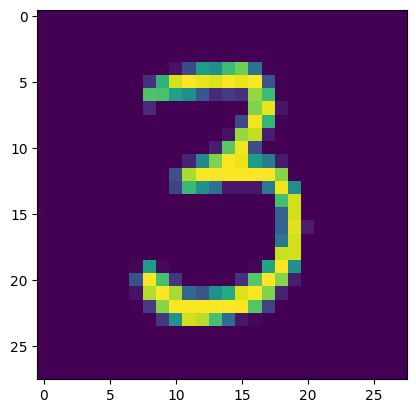

In [4]:
plt.imshow(X_train[50])
plt.show()

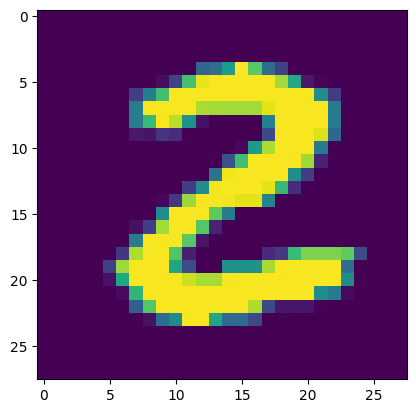

In [5]:
plt.imshow(X_train[25])
plt.show()

In [6]:
#Scaling the values.
X_train = X_train/255
X_test = X_test/255

**Building The Neural Network.**

In [7]:
from keras.api._v2.keras import activations
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid'),
    ]
)

In [8]:
#Compiling the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Training the Neural network model.
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1399 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1030 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

In [10]:
#Evalute the model.
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0954 - accuracy: 0.9749


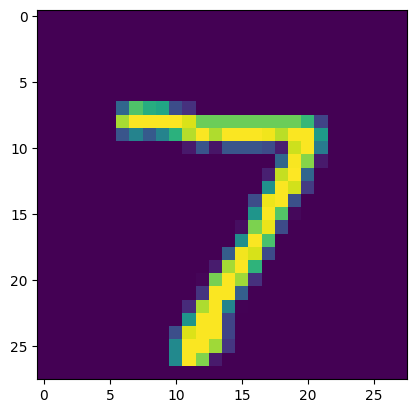

In [12]:
#Print the first data in X_test.
plt.imshow(X_test[0])
plt.show()

In [13]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
print(Y_pred[0])

[4.8840474e-03 4.7899859e-05 1.4167140e-01 6.1029369e-01 3.7916836e-06
 7.1739097e-04 1.7976910e-07 9.9997771e-01 2.5245118e-01 3.0967633e-03]


In [16]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [17]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

**Confusion Matrix.**

In [19]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 963    0    2    1    1    1    6    2    3    1]
 [   0 1123    2    1    0    3    3    1    2    0]
 [   4    3  997    3    3    4    4    5    9    0]
 [   0    0    4  983    0    8    1    4    4    6]
 [   0    2    5    0  956    0    4    4    1   10]
 [   2    0    0    9    1  872    3    1    3    1]
 [   4    2    1    1    1    9  939    0    0    1]
 [   1    7    6    1    2    0    0 1000    5    6]
 [   3    1    3    4    3   11    1    3  942    3]
 [   0    3    0    5    8    5    3    4   10  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

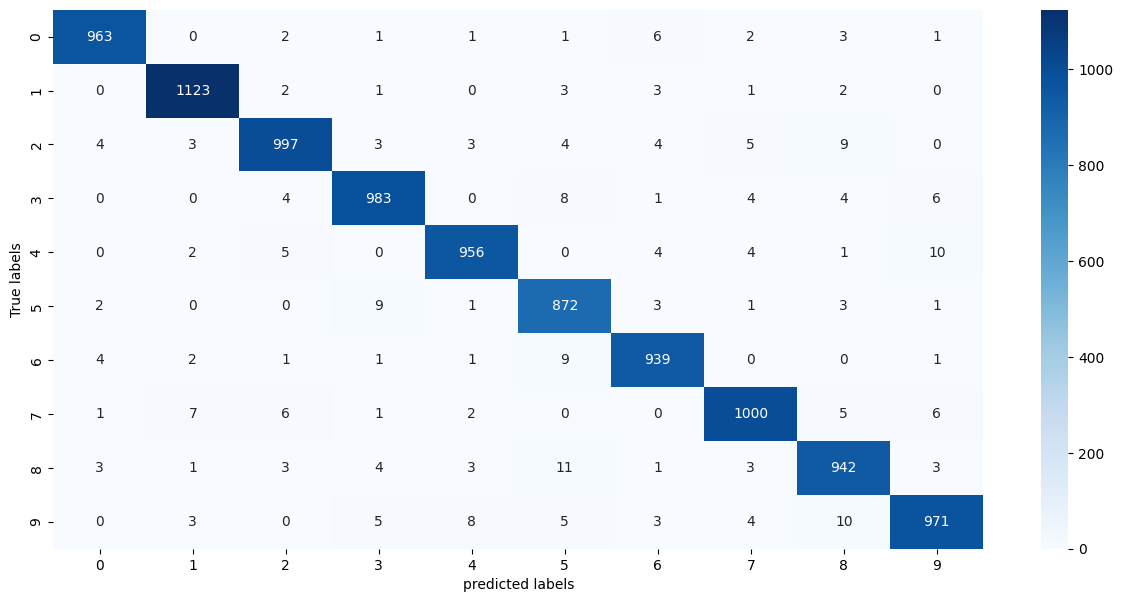

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

**Build a Predictive System.**

In [23]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

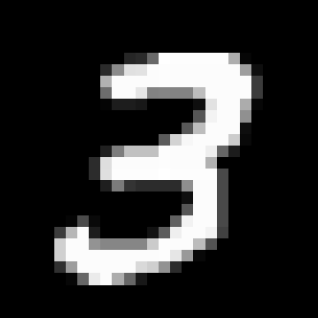

In [24]:
cv2_imshow(input_image)

In [25]:
input_image.shape

(318, 318, 3)

In [27]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [30]:
#Resize the input image.
resized_input_image = cv2.resize(grayscale, (28,28))
resized_input_image.shape

(28, 28)

In [29]:
cv2_imshow(resized_input_image)

In [31]:
resized_input_image = resized_input_image/255

In [32]:
#Reshape the image.
image_reshape = np.reshape(resized_input_image, [1,28,28])

In [34]:
prediction = model.predict(image_reshape)
prediction_label = np.argmax(prediction)
print(prediction_label)

1/1 [==============================] - 0s 29ms/step
3


**Predictive Model.**

Enter the path of image/content/MNIST_digit.png


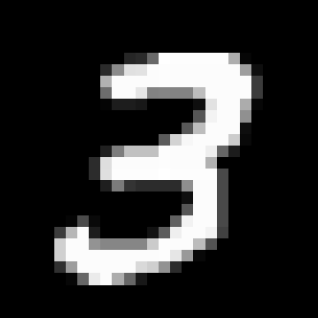

1/1 [==============================] - 0s 35ms/step
3


In [35]:
input_image_path = input('Enter the path of image')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
resized_input_image = cv2.resize(grayscale, (28,28))
resized_input_image = resized_input_image/255
image_reshape = np.reshape(resized_input_image, [1,28,28])
prediction = model.predict(image_reshape)
prediction_label = np.argmax(prediction)
print(prediction_label)